In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 100

<AxesSubplot:>

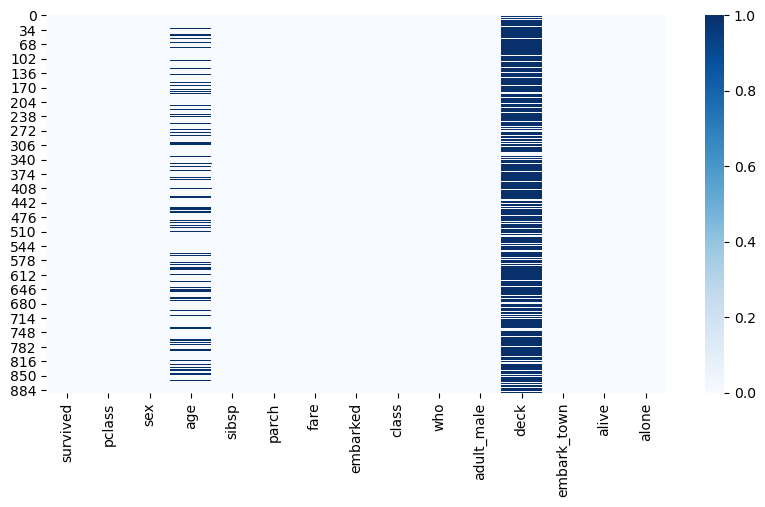

In [9]:
sns.heatmap(titanic.isnull(),cmap = 'Blues', cbar = True)

In [10]:
# To find correlation matrix
cormat = titanic.corr()
cormat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

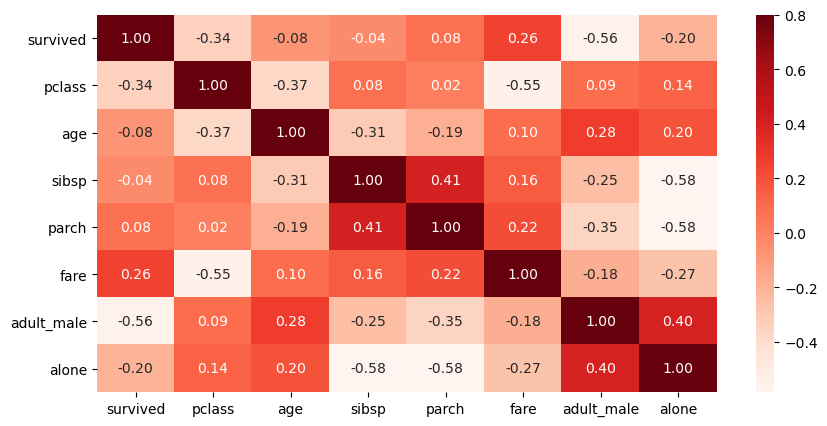

In [11]:
sns.heatmap(cormat, annot = True, fmt = '.2f', cmap = 'Reds', vmax = 0.8)

# Univariate Analysis

C:\Users\Chinmay Parab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chinmay Parab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chinmay Parab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='Density'>

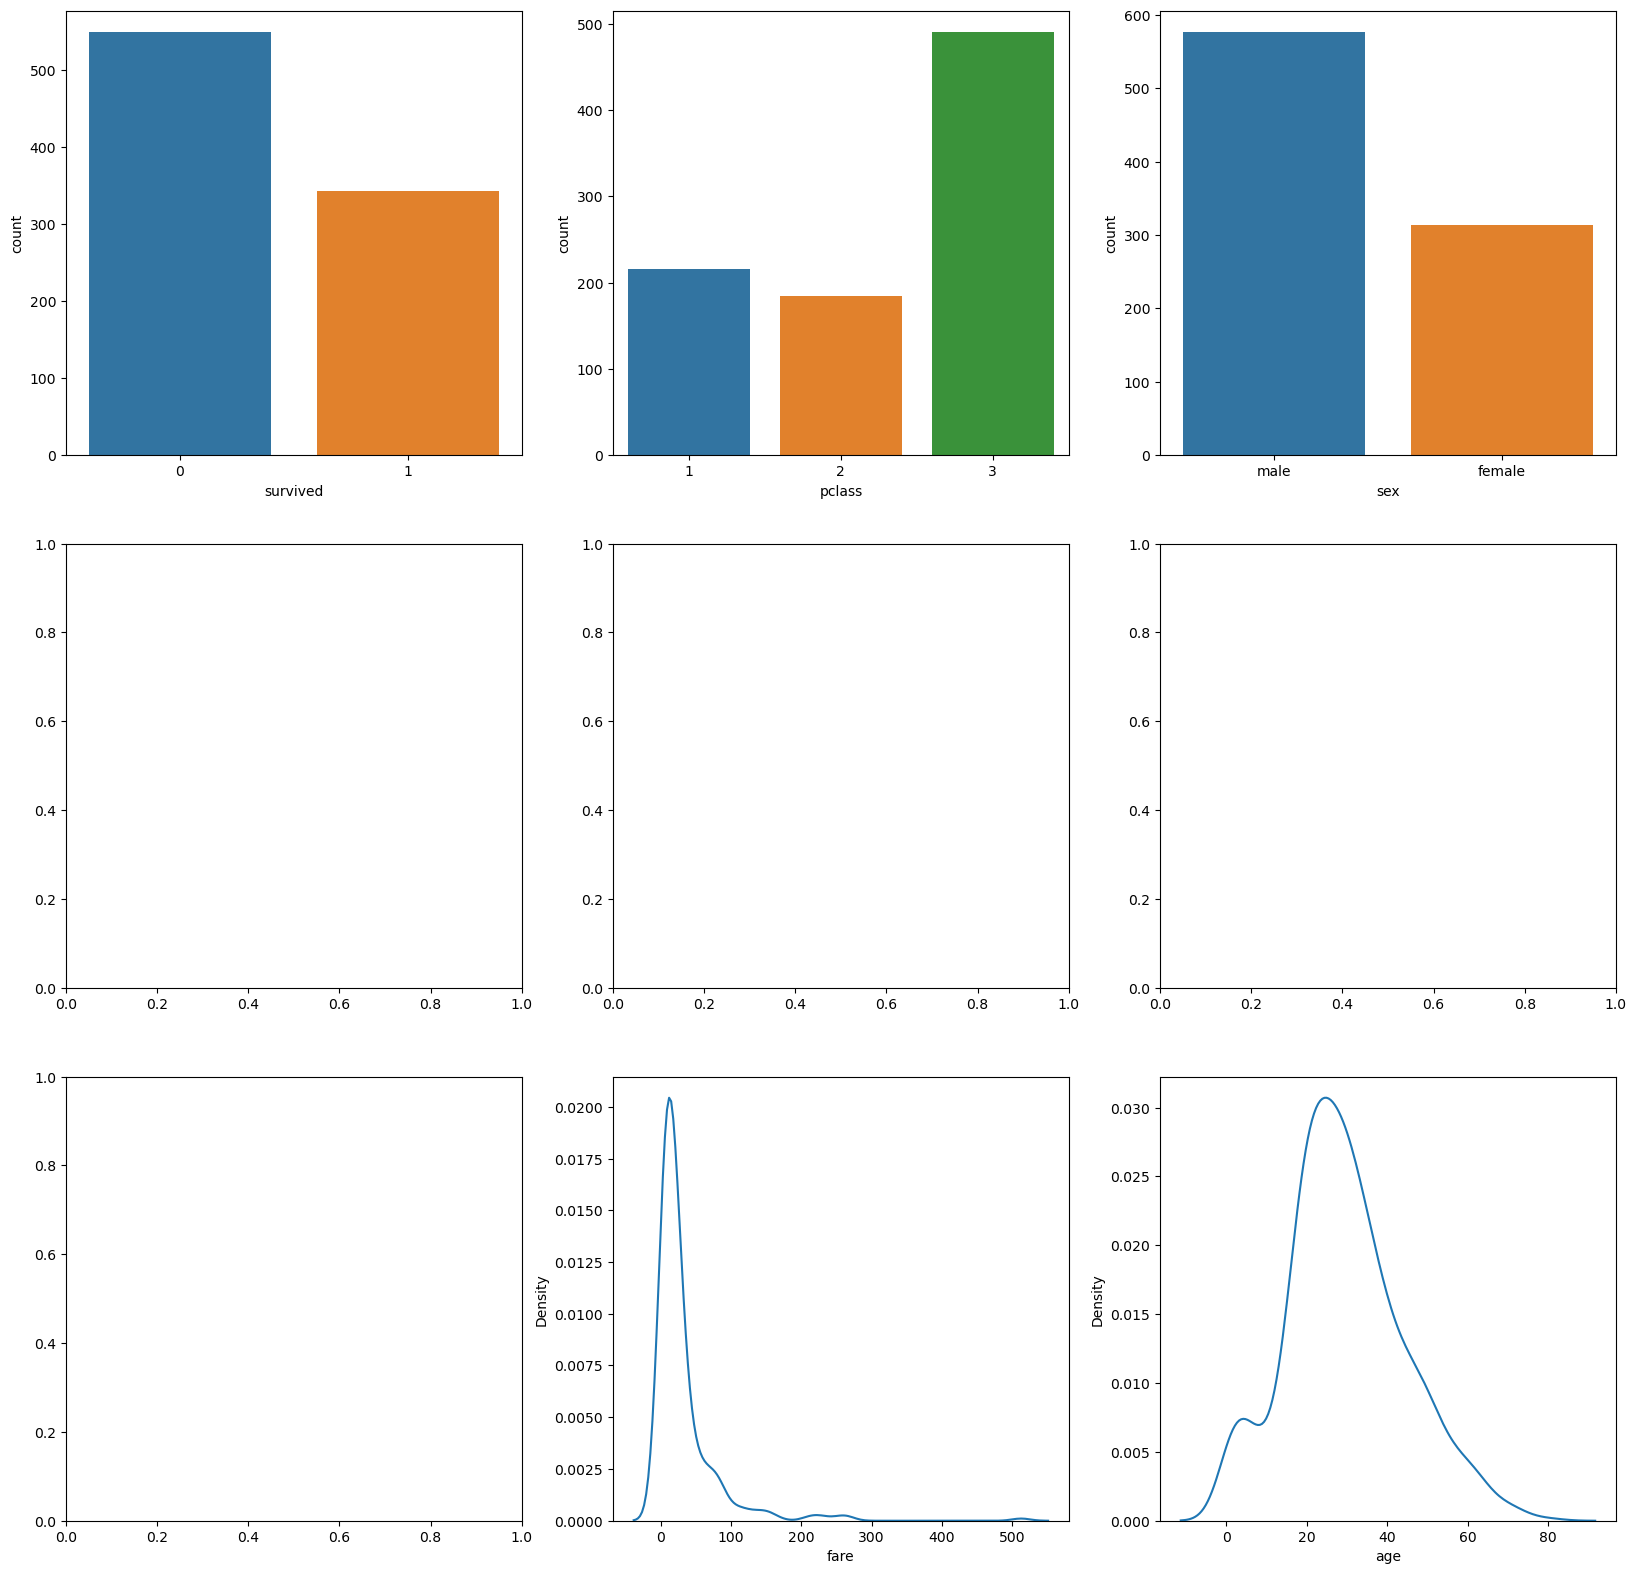

In [58]:
cnv, ax = plt.subplots(3,3, figsize = (20,20))
sns.countplot('survived', data = titanic, ax = ax[0][0])
sns.countplot('pclass', data = titanic, ax = ax[0][1])
sns.countplot('sex', data = titanic, ax = ax[0][2])

sns.kdeplot(titanic['fare'], ax = ax[2][1])
# titanic[titanic['age']]
sns.kdeplot(titanic['age'].dropna(), ax = ax[2][2])

In [13]:
import sys
np.set_printoptions(threshold=sys.maxsize)


In [14]:
np.array(titanic['age'])

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [15]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

C:\Users\Chinmay Parab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Titanic Survived plot')

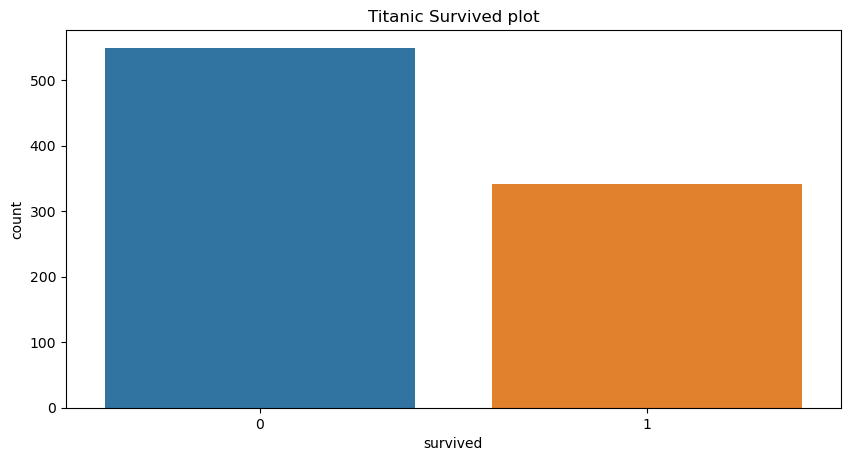

In [17]:
sns.countplot('survived', data = titanic)
plt.title('Titanic Survived plot')

<AxesSubplot:ylabel='Frequency'>

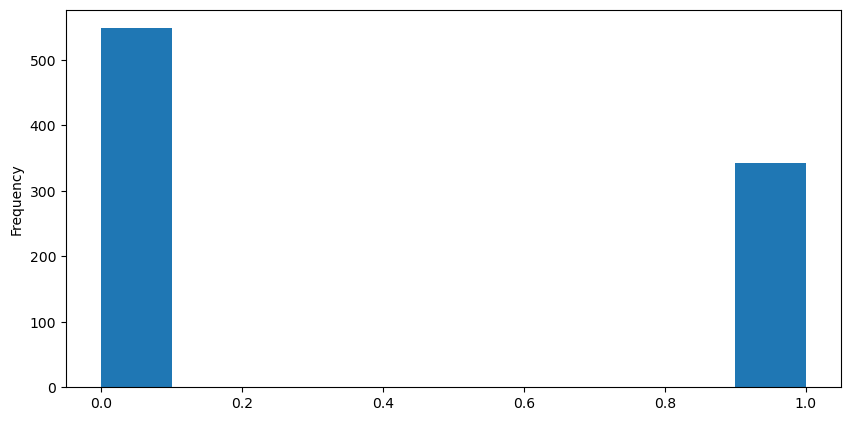

In [18]:
titanic['survived'].plot.hist()

<AxesSubplot:ylabel='survived'>

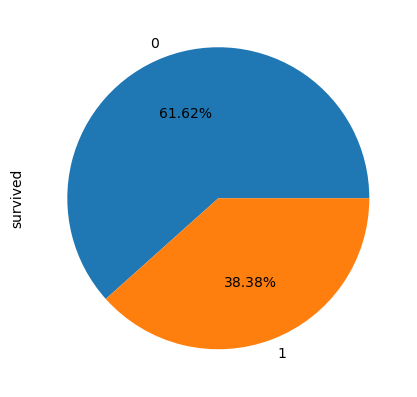

In [19]:
titanic['survived'].value_counts().plot.pie(autopct = '%.2f%%')

# Passenger class

In [20]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [21]:
titanic.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

C:\Users\Chinmay Parab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

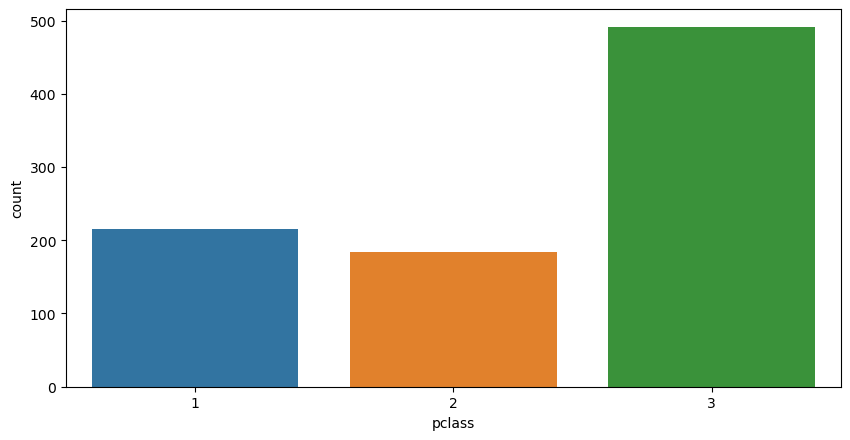

In [22]:
sns.countplot('pclass', data = titanic)

C:\Users\Chinmay Parab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

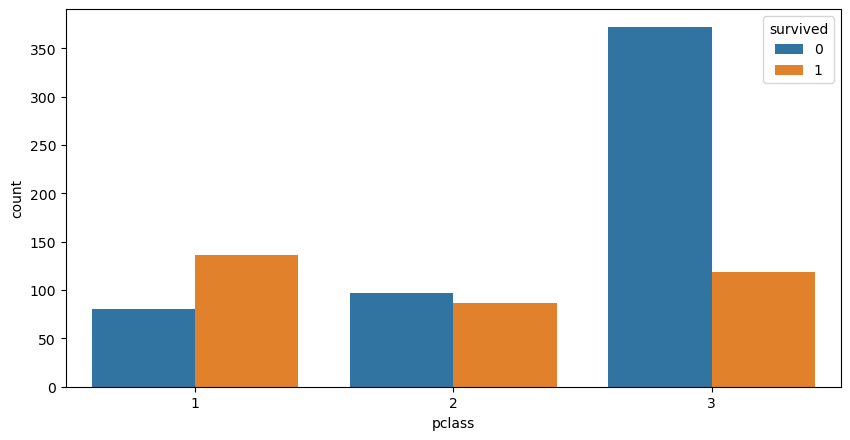

In [23]:
sns.countplot('pclass', data = titanic, hue = 'survived')

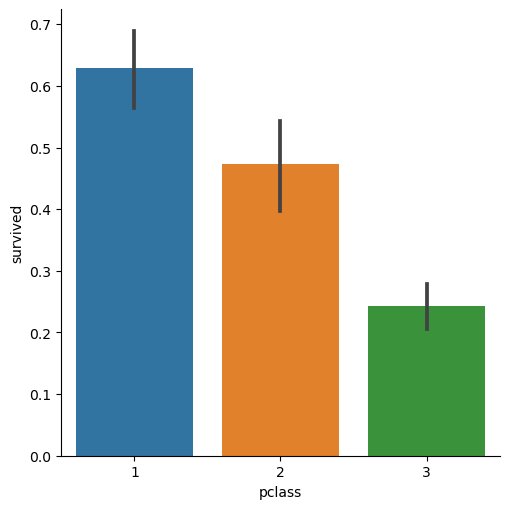

In [24]:
# Checking the survival rate/probablity using bar plot in categorical plot
sns.catplot(x = 'pclass', y = 'survived', data = titanic, kind = 'bar')

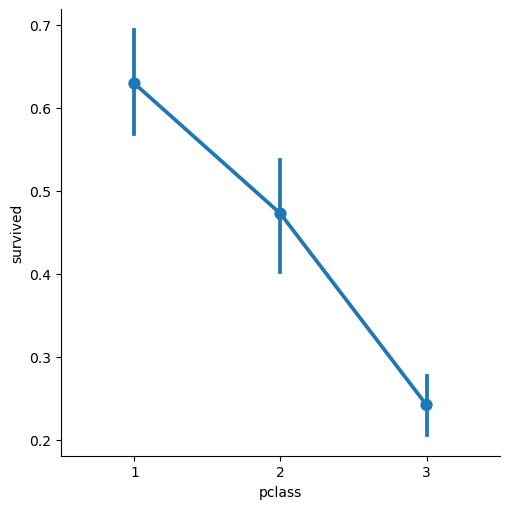

In [25]:
# Checking the survival rate/probablity using bar plot in categorical plot
sns.catplot(x = 'pclass', y = 'survived', data = titanic, kind = 'point')

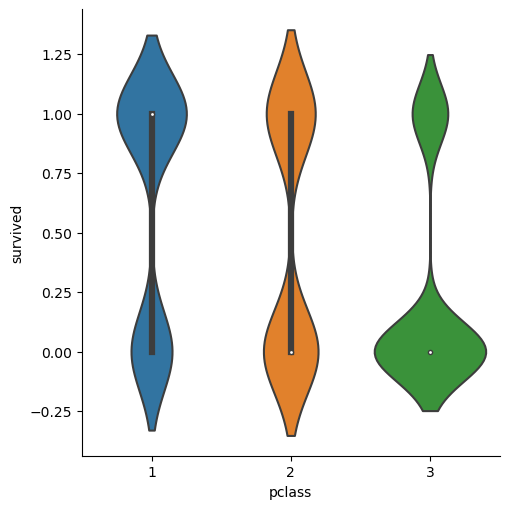

In [26]:
# Checking the survival rate/probablity using violin plot in categorical plot
sns.catplot(x = 'pclass', y = 'survived', kind = 'violin', data = titanic)

# Geneder plot

In [27]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [28]:
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

C:\Users\Chinmay Parab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

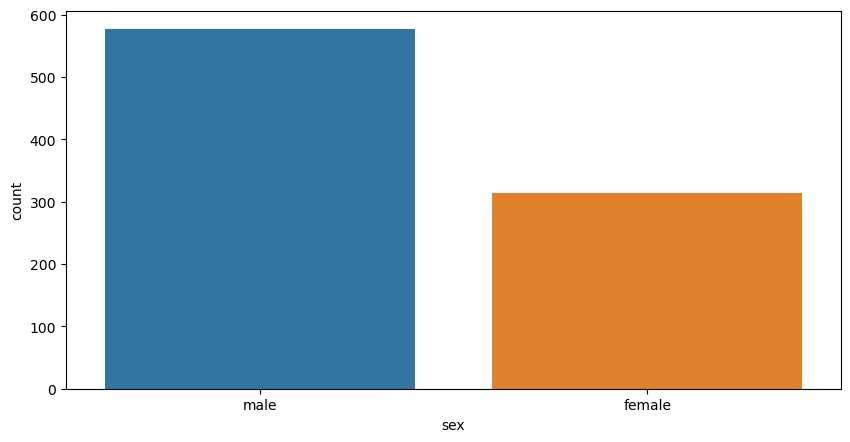

In [29]:
sns.countplot('sex', data = titanic)

C:\Users\Chinmay Parab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

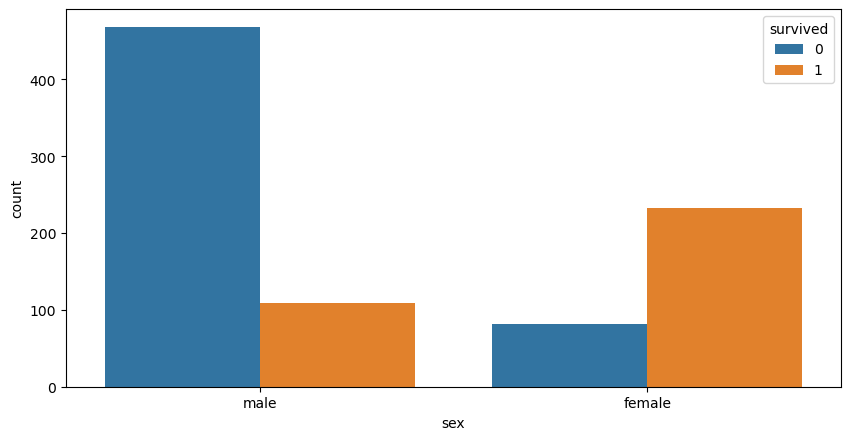

In [30]:
sns.countplot('sex', data = titanic, hue = 'survived')

<AxesSubplot:ylabel='sex'>

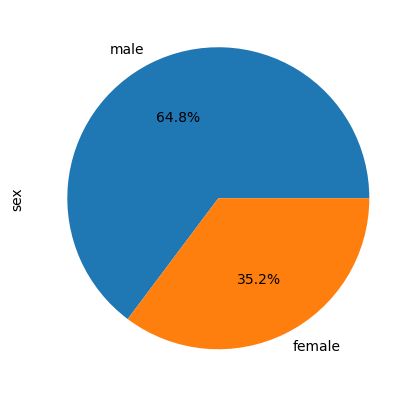

In [31]:
titanic['sex'].value_counts().plot.pie(autopct = '%1.1f%%')

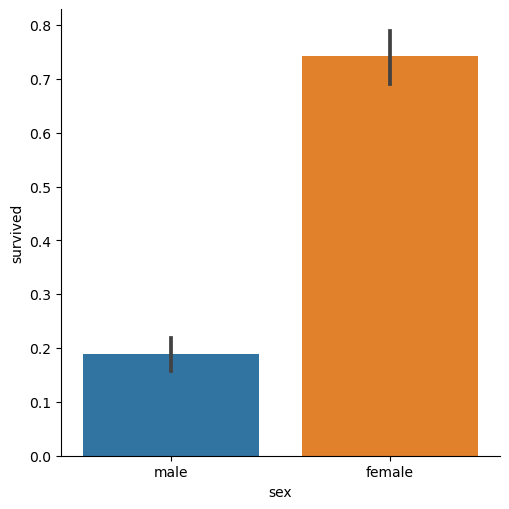

In [32]:
# Checking the survival rate/probablity using bar plot in categorical plot
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic)

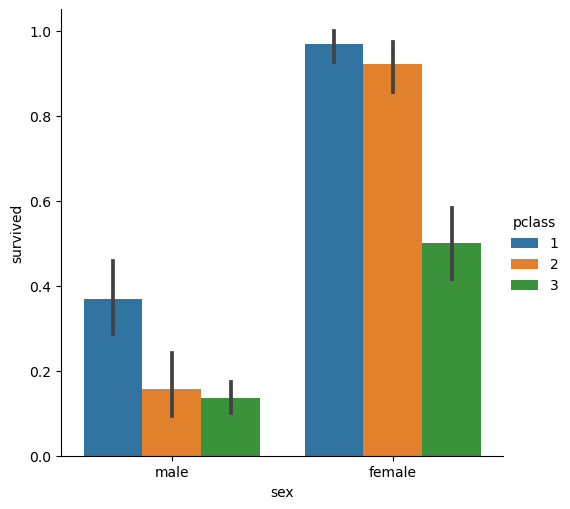

In [33]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass')

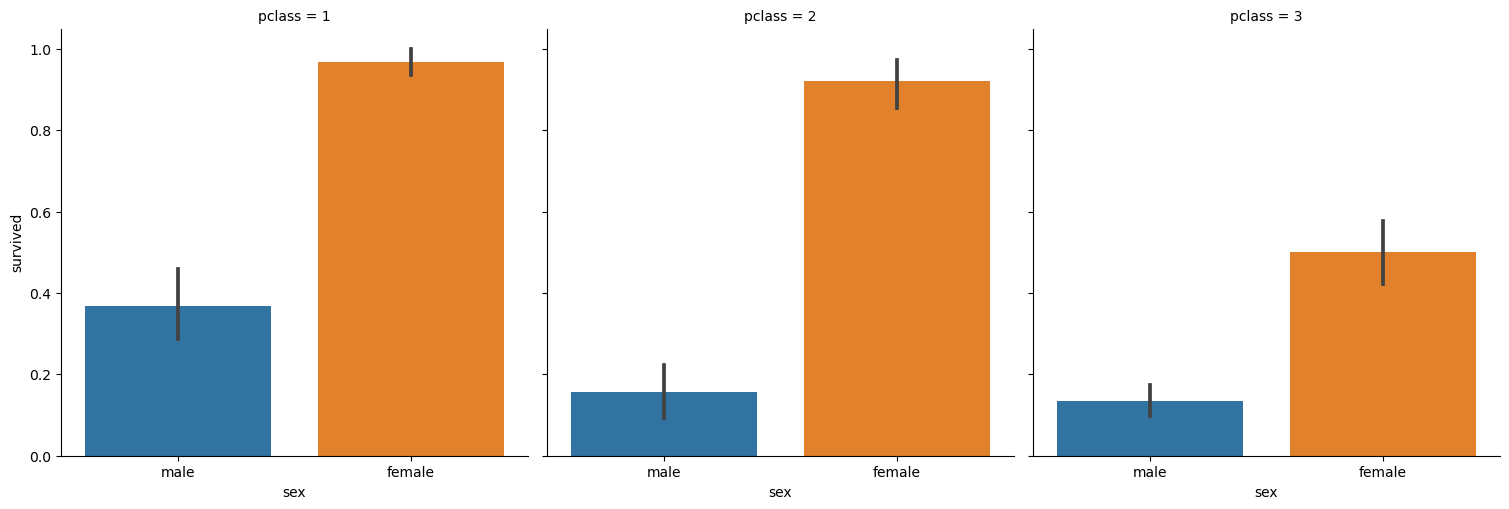

In [34]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, col = 'pclass')

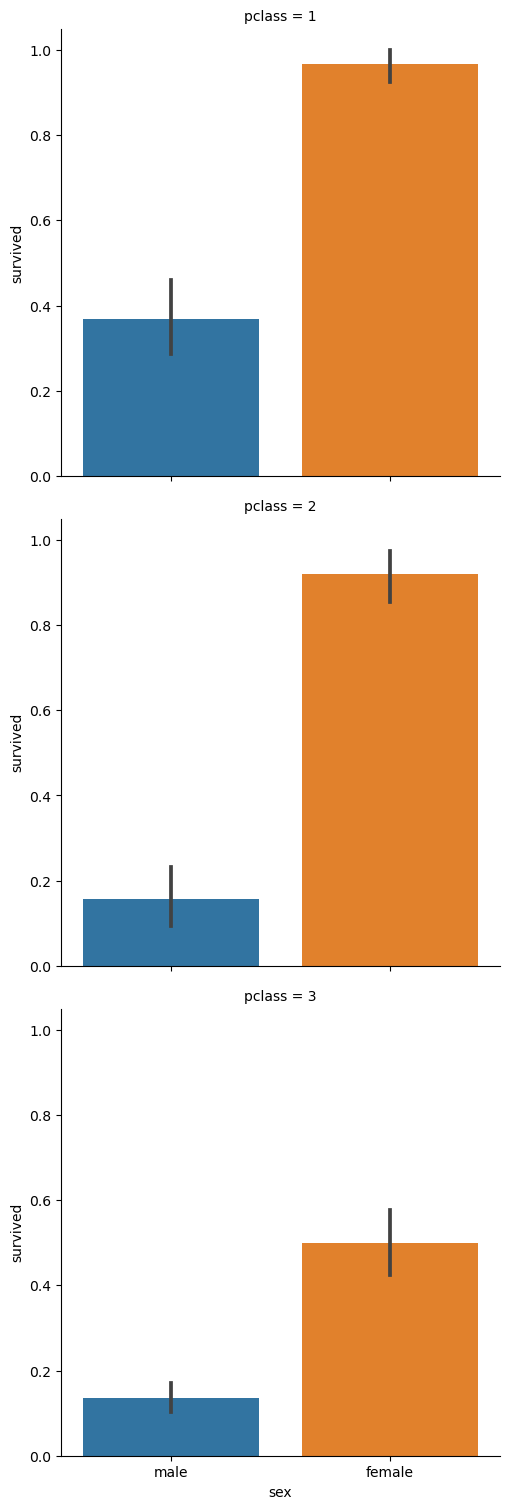

In [35]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, row = 'pclass')

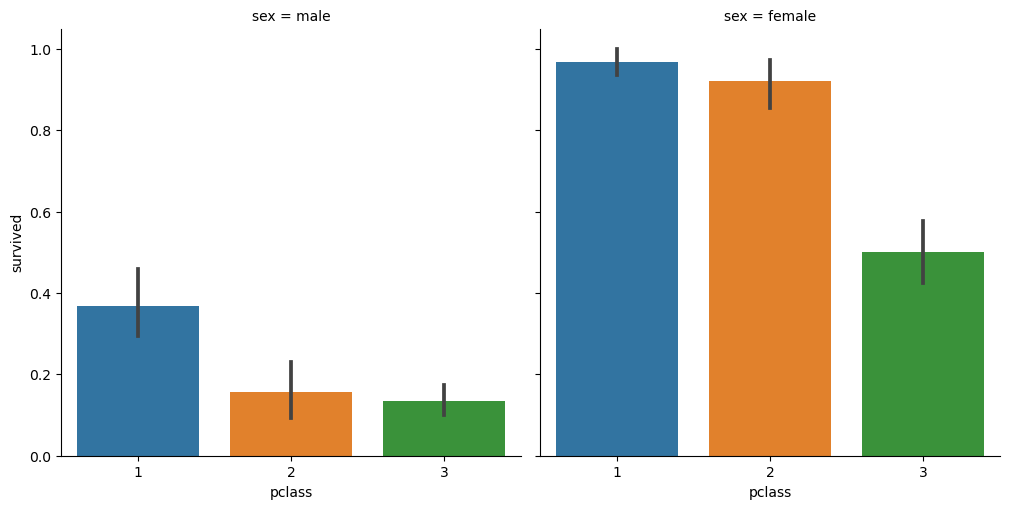

In [36]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = titanic, col = 'sex')

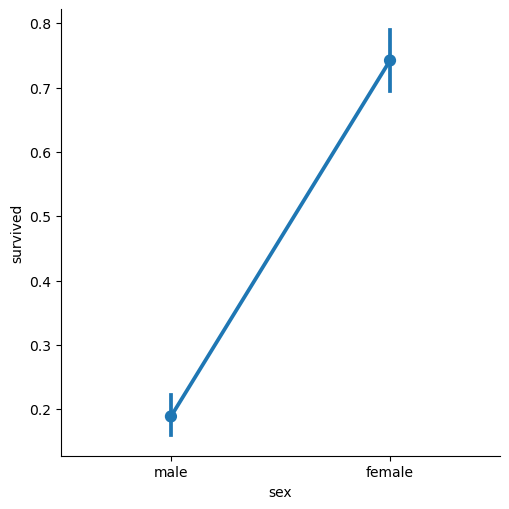

In [37]:
sns.catplot(x = 'sex', y = 'survived', kind = 'point', data = titanic)

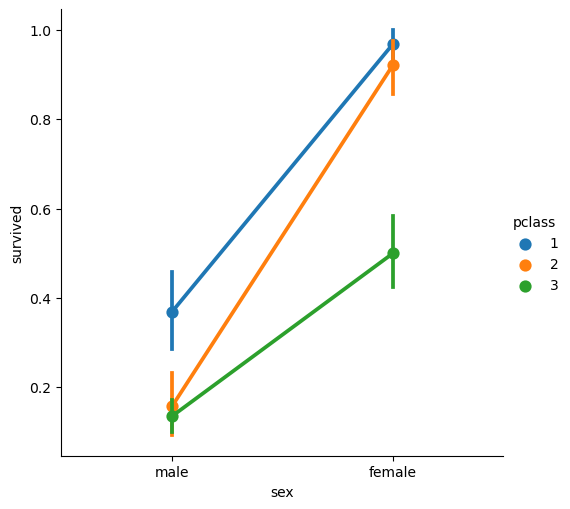

In [38]:
sns.catplot(x = 'sex', y = 'survived', kind = 'point', data = titanic, hue = 'pclass')

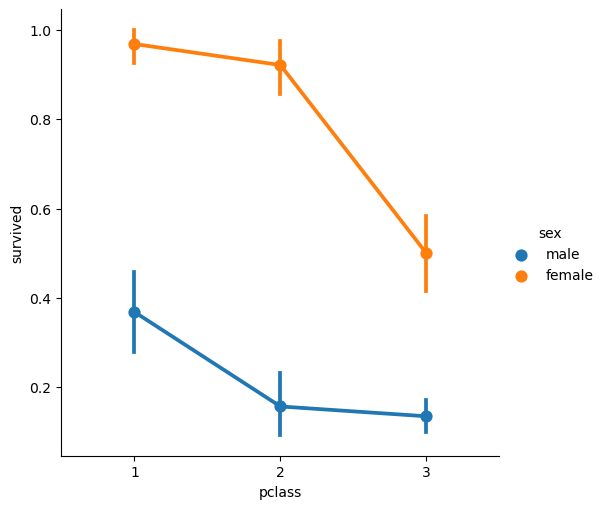

In [39]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = titanic, hue = 'sex')

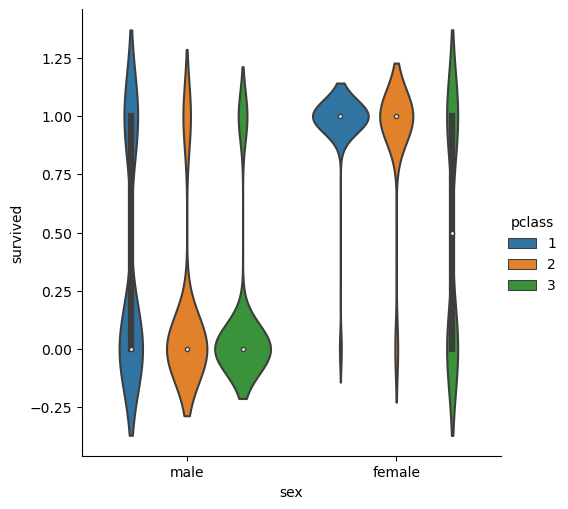

In [40]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic, hue = 'pclass')

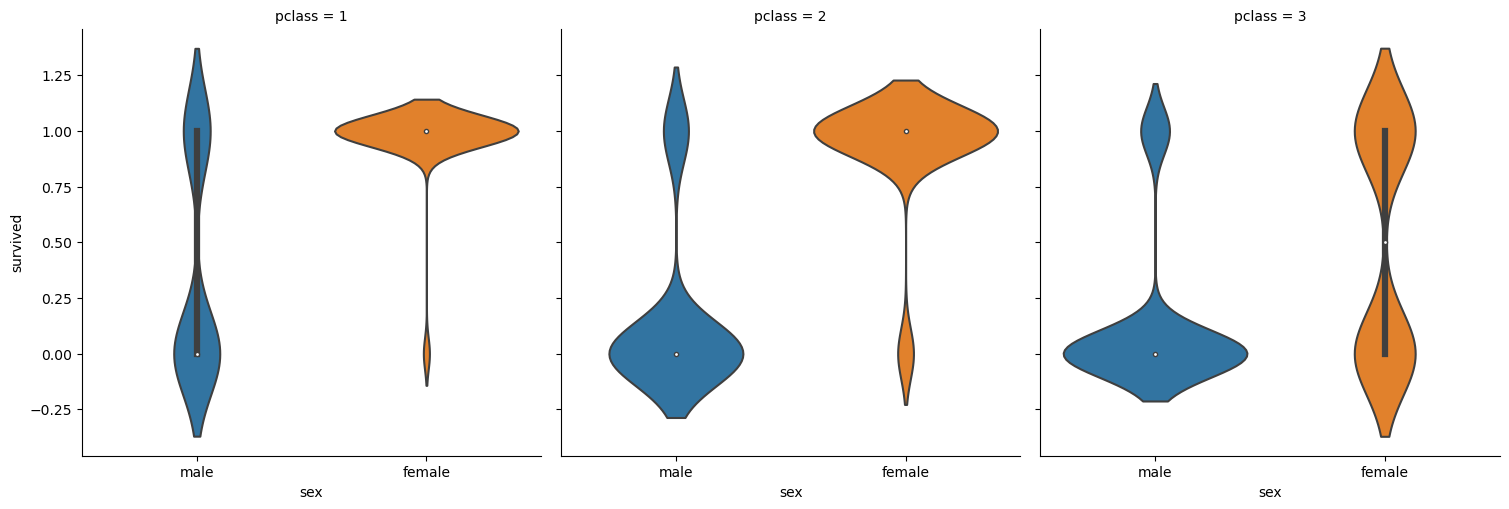

In [41]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic, col = 'pclass')

# Age Analysis

Text(0.5, 0, 'Age')

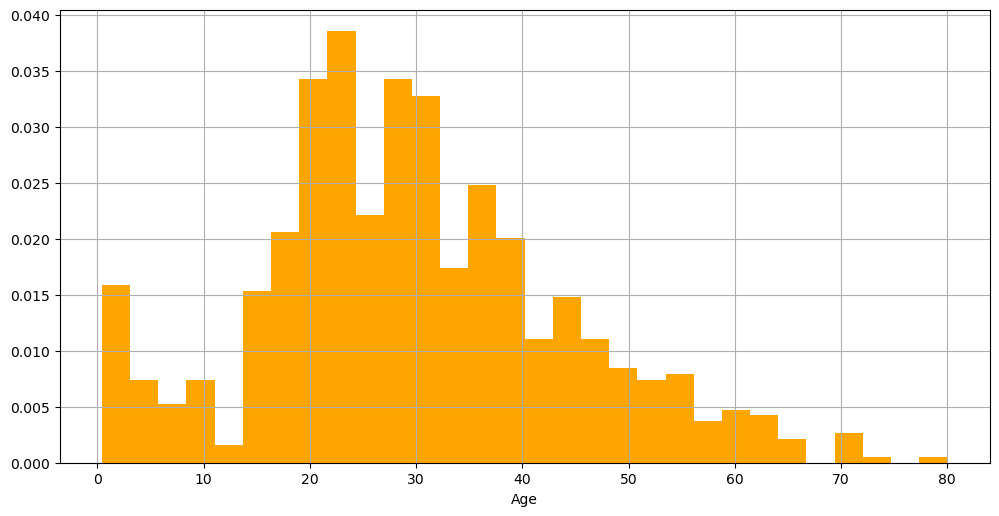

In [42]:
titanic['age'].hist(bins = 30,density = True, color = 'Orange', figsize = (12,6))
plt.xlabel('Age')

In [55]:
# sns.displot(titanic['age'].dropna())

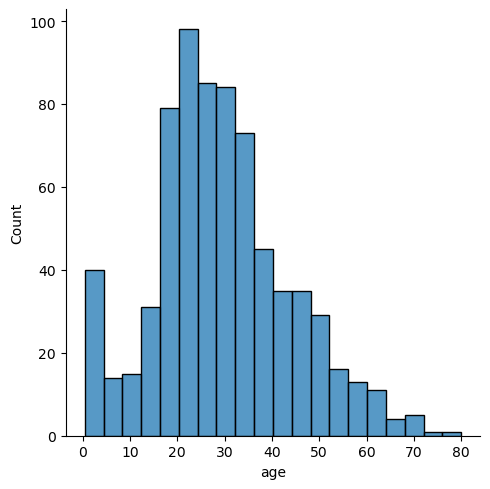

In [57]:
sns.displot(titanic['age'])

# Age analysis using categorical plot

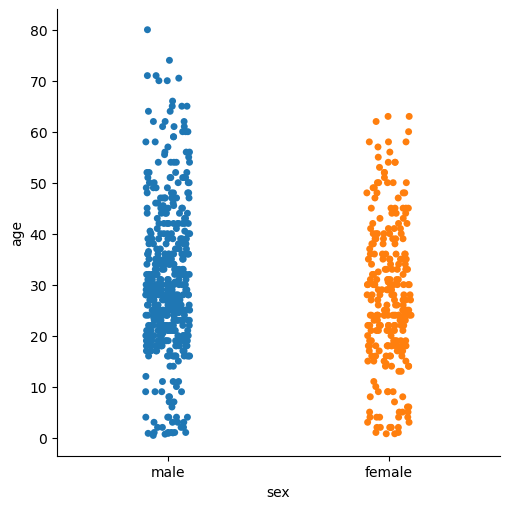

In [45]:
sns.catplot(x = 'sex', y ='age', data = titanic)

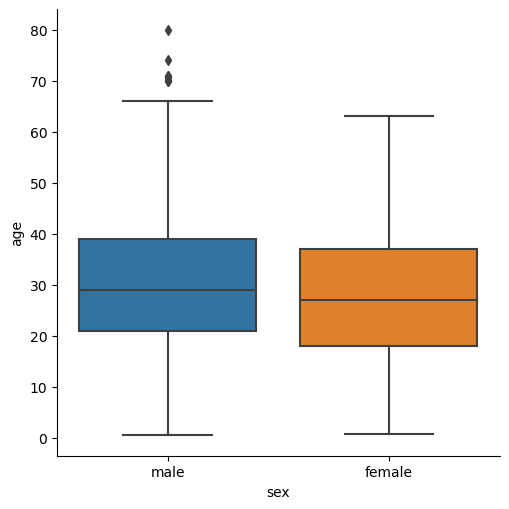

In [46]:
sns.catplot(x = 'sex', y ='age', data = titanic, kind = 'box')

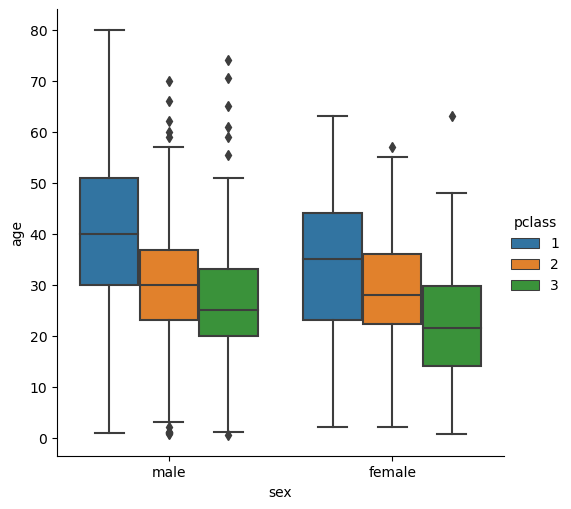

In [47]:
# Sex plot for every passenger class
sns.catplot(x = 'sex', y ='age', data = titanic, kind = 'box', hue = 'pclass')

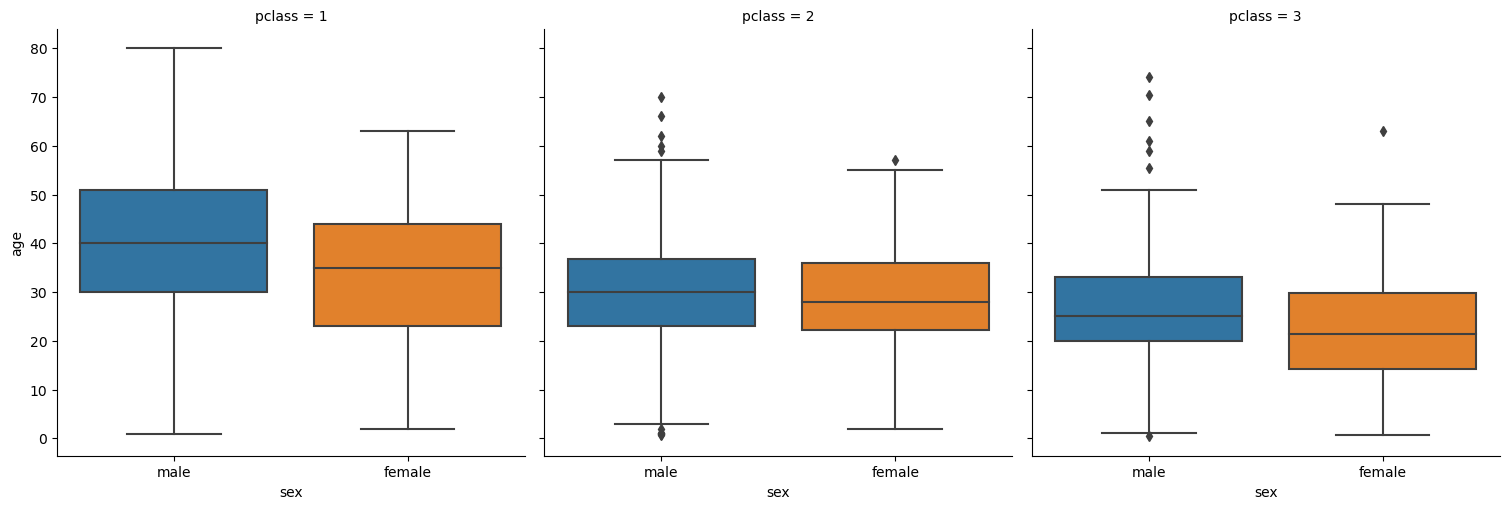

In [48]:
# Sex plot for every passenger class in different column
sns.catplot(x = 'sex', y ='age', data = titanic, kind = 'box', col = 'pclass')

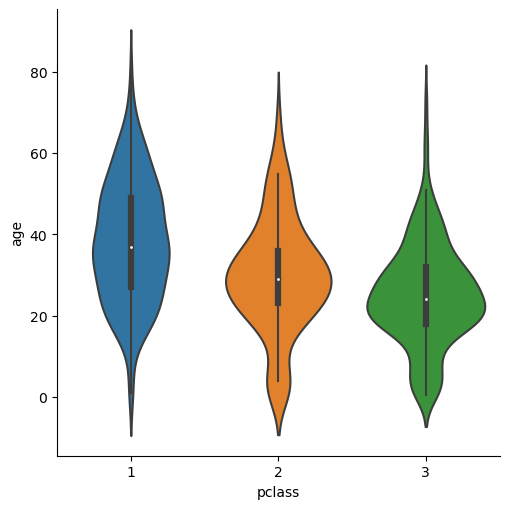

In [49]:
sns.catplot(x = 'pclass', y ='age', data = titanic, kind = 'violin')

# P{assenger class vs age}

C:\Users\Chinmay Parab\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


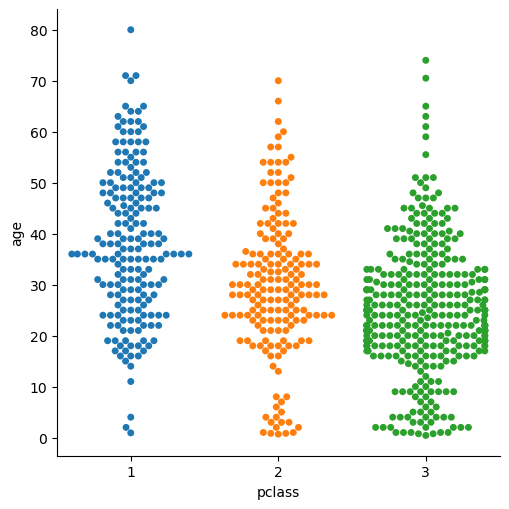

In [50]:
sns.catplot(x = 'pclass', y ='age', data = titanic, kind = 'swarm')

C:\Users\Chinmay Parab\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


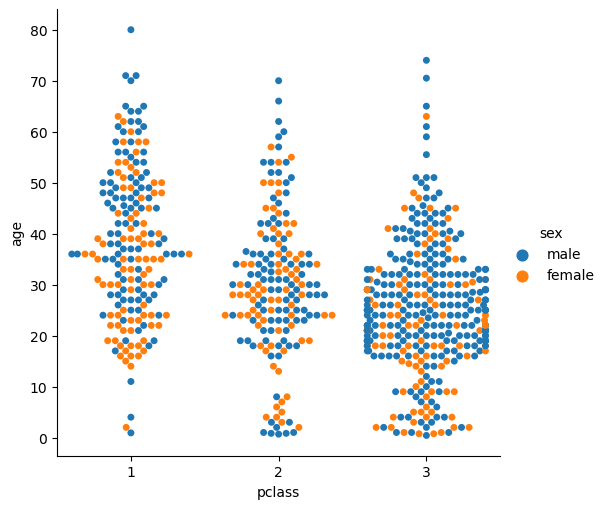

In [54]:
sns.catplot(x = 'pclass', y ='age', data = titanic, kind = 'swarm', hue = 'sex')

C:\Users\Chinmay Parab\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


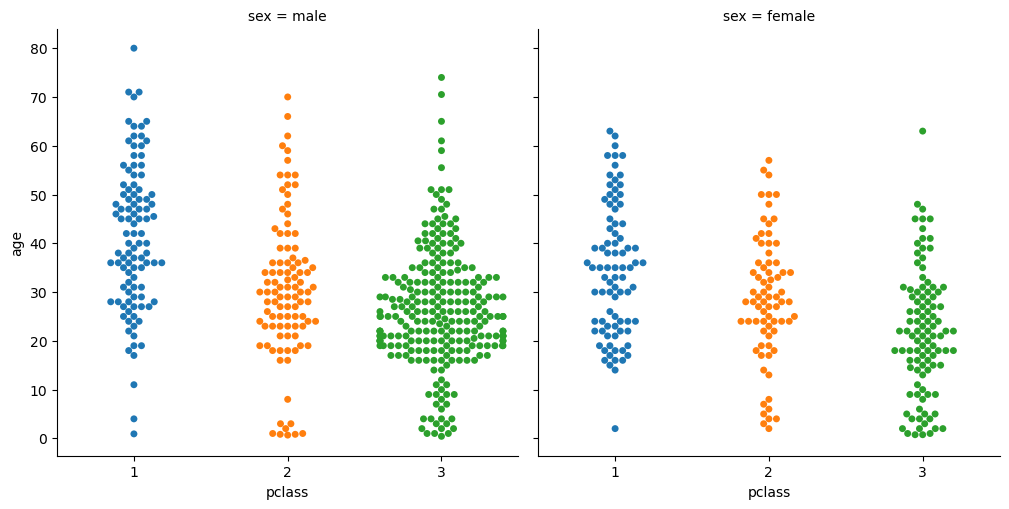

In [52]:
sns.catplot(x = 'pclass', y ='age', data = titanic, kind = 'swarm', col = 'sex')